# 主成分分析（Principal Component Analysis）

PCA主成分分析不仅仅是机器学习领域重要的算法，也是统计学领域的非常重要的方法（数理分析中出现）。
* 一个非监督的机器学习算法
* 主要用于数据的降维
* 通过降维（降维之后，可以显著的提升算法的效率，也方便数据的可视化），可以发现更便于人类理解的特征
* 其他应用：可视化，去噪（对于一些数据，经过主成分分析之后，在应用机器学习的算法，相应的识别率会更好）

**主成分分析是从一个坐标系到另外一个坐标系的过程**

## 什么是主成分分析？
如下图中，我们的数据有两个特征，但是我们有一个将两个维度降为一个维度的需求，我们应该怎么处理呢？
![](img/isea41.jpg)
* 最简单的处理方式就是直接扔掉其中一个特征，保留另外一个特征，**如下**
![](img/isea42.jpg)

以上两种降维方式中，右侧的会更好一些，因为右侧的更好的保持了原来的数据点的特征，点和点之前有更好的可区分度，也更好的保持了原来的点和点之间的距离。

我们尝试找到更好的方案：找到一个让样本之间的间距更大的轴？
![](img/isea43.jpg)

如何定义样本之间的间距？方差（描述样本之前数据的疏密程度的指标）也即我们需要找到一个轴，使得样本空间的所有的点映射到这个轴后，方差最大。

方差的公式：$Var(x)=\frac{1}{m}\sum_{i=1}^{m}{(x_i - \overline{x})}^2$

第一步：每一个样本减去样本的均值。（demean操作，demean 的目的是化简方差公式）
![](img/isea44.jpg)
 
效果和将坐标轴进行移动的效果是一样的。此时公式中的Xi 是已经映射到红色的轴上的得到的新的样本点。该轴表示为w =（w1，w2），我们需要获知两个轴的方向，该轴还是在一个二维平面中。

第二步：我们想要求一个轴的方向w = （w1，w2）,使得我们所有的样本，映射到w以后，有:$Var(X_{project}) = \frac{1}{m}\sum_{i=1}^{m}{(X_{project}^{(i)} - {\overline{X}}_{project})^2}$

其中$X_{projct}$表示的是映射之后的样本，也即使得映射之后的样本的方差达到最大。对于本例来说$X_{project}^{(i)}$和${\overline{X}}_{project}$都是包含两个值的向量。

 ### 求数据的主成分

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
# 设计两个特征存在一定的线性关系，会获得更好的降维效果
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

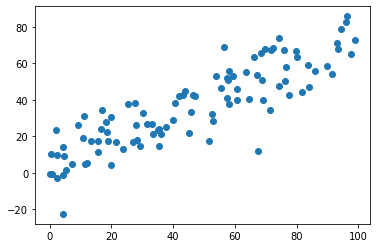

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [6]:
def demean(X):
    # 对X这个矩阵，在行的方向上求均值，求的结果其实是每一列的均值
    return X - np.mean(X, axis=0)

In [9]:
np.mean(X,axis=0)

array([45.95900199, 36.35231746])

In [10]:
X_demean = demean(X)

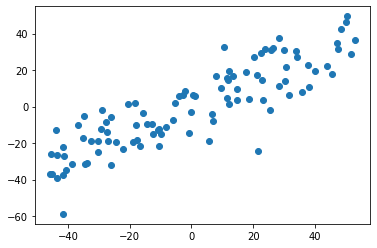

In [11]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()


In [12]:
np.mean(X_demean[:,0])

-1.4139800441625994e-14

In [13]:
np.mean(X_demean[:,1])

-8.029132914089131e-15

### 梯度上升法

#### 梯度上升法的数学推导

![](img/pca/pca100.jpg)

In [ ]:
# 目标函数
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [16]:
# 目标函数对应的梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [17]:
# 验证我们求出来的梯度是正确的
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [ ]:
# 将w化做是单位向量
def direction(w):
    return w / np.linalg.norm(w)

In [26]:
# 梯度上升法
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [22]:
X.shape[1]

2

In [24]:
# 初始的搜索位置不能为0
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始

# 初始向量的值
initial_w

array([0.02241921, 0.40284386])

In [25]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据，因为标准化的时候，方差为1了，但是
# 我们的目标函数就是求方差的最大值

In [27]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.79903321, 0.6012869 ])

In [28]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.79903321, 0.6012869 ])

In [29]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

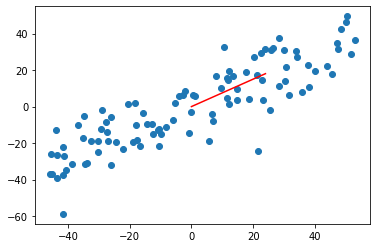

In [30]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

In [33]:
# 归一化之后得到的单位向量
w

array([0.79903321, 0.6012869 ])

对于上图：红色的直线对应的方向就是我们求出来的，把这些样本映射到当前的轴上对应的样本之间方差是最大的，这个轴就是一个主成分。这是第一主成分。   

### 使用极端数据集测试

所有数据都分布在一条直线上

In [31]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

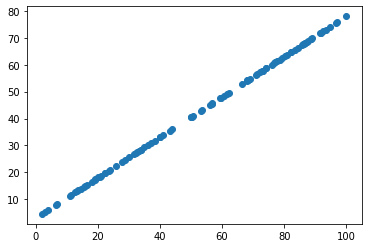

In [32]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

如果我们使用PCA将所有的点映射到某个轴上，还处于当前的直线上，得到w应该和上面单位向量的结果是一样的

In [35]:
X2_demean = demean(X2)

In [36]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

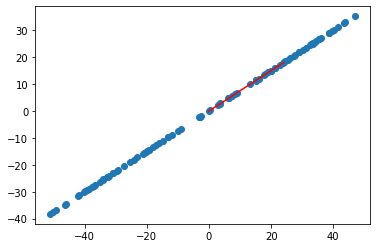

In [37]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

### 求数据的前n个主成分

对于上述的有两个特征的样本，我们找到了第一主成分，也就是将所有的样本点映射到第一个轴上的数据，其实这个样本还应该有第二个轴，如果样本有n个特征，那么样本应该就有n个轴。只不过这些数据经过主成分分析的方式进行了重新的排列，使得第一个轴保持这些样本的方差是最大的，第二个轴次之，第三个轴再次之。

换言之，主成分分析法是从一个坐标系转移到了另外一个坐标系。

那么我们在求出第一主成分之后，如何求出下一个主成分呢？
* 方法：数据进行改变，将数据在第一个主成分上的分量去掉。 $X^{'(i)}=X^{(i)} - X_{project}^{(i)}$  $X^{'(i)}$ 其实就是和 $X_{project}^{(i)}$垂直的向量
* 在新的数据上求第一主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [5]:

def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X = demean(X)

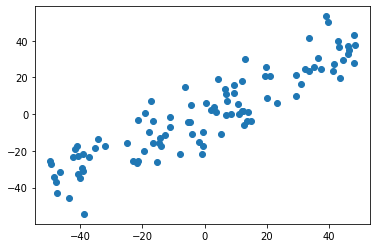

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [8]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [9]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)

# 求出了第一主成分
w

array([0.7856452 , 0.61867732])

In [10]:
# X2初始化为空的矩阵
X2 = np.empty(X.shape)

for i in range(len(X)):
    # X[i].dot(w) 即为X[i]映射到w上之后的模，乘以w（向量）    即为Xproject向量
    X2[i] = X[i] - X[i].dot(w).reshape(-1,1) * w
    
# 上面的for循环，可以进行如下的向量化运算
# X2 = X - X.dot(w)。reshape(-1,1) * w

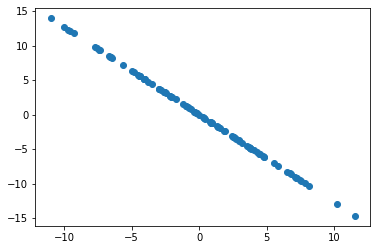

In [11]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

可以发现我们把第一个主成分方向的分量去掉了之后，剩下的就是和第一主成分方向垂直的方向的分量，结果就如上图，由于我们整个数据只有两个维度，把第一个维度的主成分去掉之后，剩下的第二维度就是所有的维度了，所以我们发现样本在第二个维度的分布完全在当前的这条直线上。

In [12]:
w2 = first_component(X2,initial_w,eta)
w2

array([ 0.61868219, -0.78564136])

In [13]:
w.dot(w2)

6.2060950703490825e-06

In [14]:
# 给定n的值，给定X样本值，求出前n个主成分的值
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    # 为了不改变X，只是对X的拷贝进行操作
    X_pca = X.copy()
    # demean处理
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        # 随机生成初始搜索点
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        # 用样本减去刚求出的主成分上的分量
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [15]:
first_n_components(2, X)

[array([0.78564513, 0.61867741]), array([ 0.61868105, -0.78564226])]

### 高维数据向低维数据映射

![](img/pca/pca1.png)
$W_{k}$ 有k行，表示对样本数据集求出来前k个主成分，每行有n个元素，表示每个主成分有n个元素的。（因为主成分分析的本质就是从一个坐标轴到另外的一个坐标轴）   

对于样本$X$ 有n维，我们让每一个样本去点乘W的行（也即将一个样本映射到W这个轴上得到的模）也即让$X^{(i)}$ 分别和$W^{(i)}$分别做点乘，即可到到$X^{(i)}$在k个方向上相应的每个方向上的大小。 k个元素合并在一起，就能表示$X^{(i)}$样本映射到新的k个轴所代表的坐标系上相应的样本的大小。

也即做了一个矩阵乘法

$X \cdot W_k^T = X_{k}$

从维度上理解：$(m*n) \cdot (n*k) = m * k $

由此，我们就获取了新的矩阵，有m行k列

对于新获得m*k 的矩阵，我们可以对其进行还原
![](img/pca/pca2.png)

只不过，当前还原之后的矩阵，和最初始的$X$是不一样的，因为降维的时候已经丢失了一些信息。 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [1]:
from machineLearning.PCA import PCA

# 这里是一个二维的数据，通过pca转为为二维的数据
pca = PCA(n_components=2)
pca.fit(X)

NameError: name 'X' is not defined

In [27]:
# 计算出来的两个坐标轴的方向
pca.components_

array([[ 0.7595822 ,  0.65041132],
       [-0.65040598,  0.75958677]])

In [29]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [30]:
# 对数据进行降维
X_reduction = pca.transform(X)

In [31]:
# 有一百个样本，每个样本只有一个维度，也即只有一个特征
X_reduction.shape

(100, 1)

In [33]:
# 将数据恢复
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

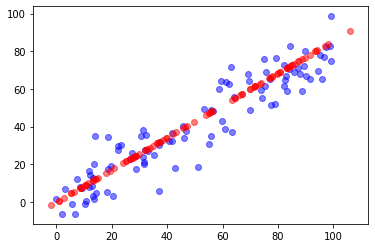

In [35]:
# 绘制恢复之后的图像
plt.scatter(X[:,0], X[:,1],color = 'b',alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1],color= 'r',alpha= 0.5)

数据在降维之后，在恢复之后，其实就回到了所有的数据点在主成分这个轴相应的位置上，此时所有的红色的点在一条直线上，但是每一个点是被二维特征表示的，这些点在二维的平面上码成了一条直线，我们完成可以把它放在一维得维度上，就放在一个轴上，用一个数值来表示。这就是pca降维的基本原理。

这个过程也可以发现，降维的过程是丢失信息的。restore之后，不过是在高维度空间里表达这些点。

### sklearn 中的PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
# 初始化的时候，传入我们想要传入的主成分的个数
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
#   
pca.components_

array([[0.75958223, 0.65041128]])

In [42]:
# 对我们的X进行降维
X_reduction = pca.transform(X)

X_reduction.shape

(100, 1)

In [43]:
# 将降维之后的数据还原
X_restore = pca.inverse_transform(X_reduction)

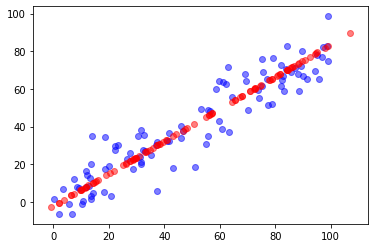

In [40]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)
plt.show()

### 使用真实的数据集来看PCA的表现
这里使用手写识别数据进行降维，然后对手写识别数据进行分类

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [64]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [66]:
X_train.shape

(1347, 64)

In [67]:
%%time

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 42.1 ms


In [68]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [69]:
from sklearn.decomposition import PCA

# 对数据进行降维，从64维降到了2维
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [70]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 1.97 ms


In [71]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

可以发现识别的精度也降低了。原来有64个维度，现在降低到了两个维度，虽然我们算法的运行速度提高了，但是识别精度却大大的降低了。但是我们具体应该降低到几维呢?除了是用网格搜索的方式，PCA给我们提供了一个指标，来衡量最优的维度参数。

#### 主成分所解释的方差¶


In [72]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

上面的连个数据告诉我们数据维持了原来数据的最大方差是多少，为百分二十多，剩下的百分之70多丢失掉了

In [73]:
pca.explained_variance_

array([175.90066519, 165.86177754])

In [74]:
# 传入的特征数量为训练数据集对应的特征数
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

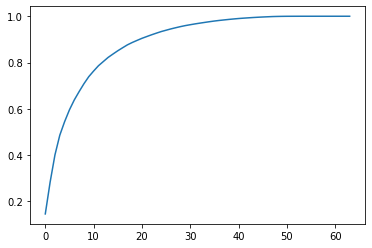

In [75]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

通过上图，我们就能看出来，大概30个主成分，能够保留原来方差的百分之90以上。

In [76]:
# 选取的主成分的个数，方差要达到原来的95%
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
pca.n_components_

28

In [78]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [81]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 3.01 ms


使用PCA进行数据降维的效果，时间！全样本全特征是42ms,损失了很低的精度，时间减少到了3.01ms。这个是值得的。

In [82]:
knn_clf.score(X_test_reduction, y_test)

0.98





### 使用PCA对数据进行降维可视化

In [84]:
pca = PCA(n_components=2)
pca.fit(X)

# 对数据惊醒降维
X_reduction = pca.transform(X)

In [86]:
X_reduction.shape

(1797, 2)

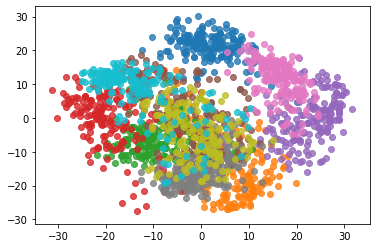

In [85]:
for i in range(10):
    # matplotlib 每次指定一个不同的颜色
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.8)
plt.show()

可以发现，数字在降低到了二维的时候，也具有很高的区分度。 例如我们只是想区分蓝色的数字和橙色的数字，二维其实就是够了。

### 更大的mnist（书写识别的数据集）

In [87]:
from sklearn.datasets.base import get_data_home 
print (get_data_home()) # 如我的电脑上的目录为： C:\Users\95232\scikit_learn_data

C:\Users\isea_you\scikit_learn_data


In [88]:
import numpy as np 

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
# 在最新版的 sklearn 中，fetch_mldata 被弃用，改为使用 fetch_openml 获得 MNIST 数据集
# 具体见如下代码，后续代码无需改变

# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784')

In [92]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [89]:
X, y = mnist['data'], mnist['target']
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [90]:
X_train.shape

(60000, 784)

In [91]:
y_train.shape

(60000,)

In [61]:
X_test.shape

(10000, 784)

In [62]:
y_test.shape

(10000,)

#### 使用KNN来进行识别

In [93]:
from sklearn.neighbors import KNeighborsClassifier
# 这里没有进行数据的归一化处理，因为手写数字识别都是每个像素点的亮度，他们都是在同一个尺度
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

Wall time: 21.7 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
上面的过程可能要花费点时间，下面预测过程花费的时间会更长

In [94]:
%time knn_clf.score(X_test, y_test)

Wall time: 13min 23s


0.9688

#### PCA进行降维

In [100]:
from sklearn.decomposition import PCA


In [101]:
# 保留90%的信息
pca = PCA(0.90)

pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [102]:
X_train_reduction.shape

(60000, 87)

In [103]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

Wall time: 449 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
%time knn_clf.score(X_test_reduction, y_test)

Wall time: 1min 15s


0.9728

In [ ]:
降维去除了噪音，有可能准确率更高！

## 使用PCA降噪

#### 回忆我们之前的例子

In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 5, size=100)

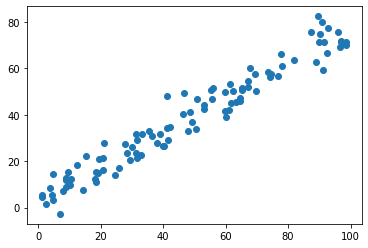

In [111]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

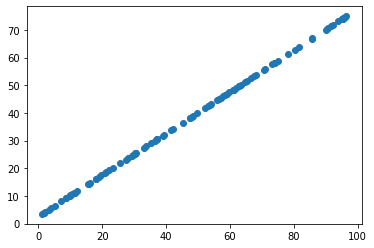

In [114]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

降维的过程可以理解成是去燥，也就是在返回到原有的数据的时候，去掉了原有数据的噪音。

    在给数据降维的同时，丢失了一部分的信息，但同时也去掉了一部分数据的噪音。

#### 手写识别的例子

In [128]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [132]:
# 创建一个有噪音的数据集，生成的是随机的正太分布的噪音
noisy_digits = X + np.random.normal(0, 4, size=X.shape)
noisy_digits.shape

(1797, 64)

In [131]:
# noisy_digits[y==0,:] 会得到一个矩阵，[:10会得到一个新的矩阵]
example_digits = noisy_digits[y==0,:][:10]
example_digits.shape

(10, 64)

In [117]:
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [118]:
example_digits.shape

(100, 64)

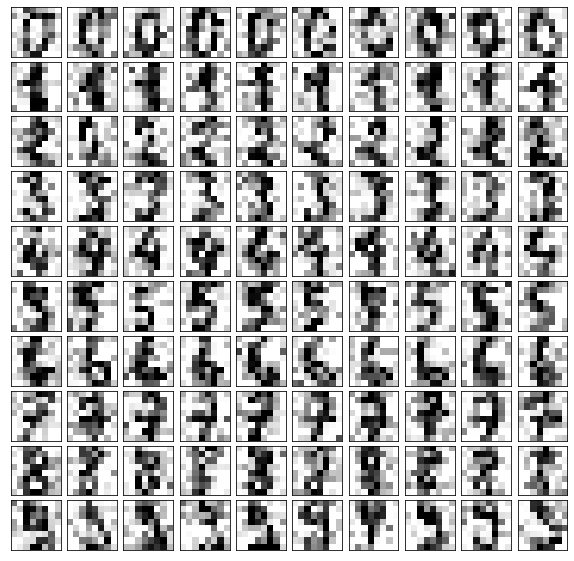

In [119]:
# 将100个元素绘制出来，绘制100个图形，在一幅图中绘制多个子图
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [120]:
pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

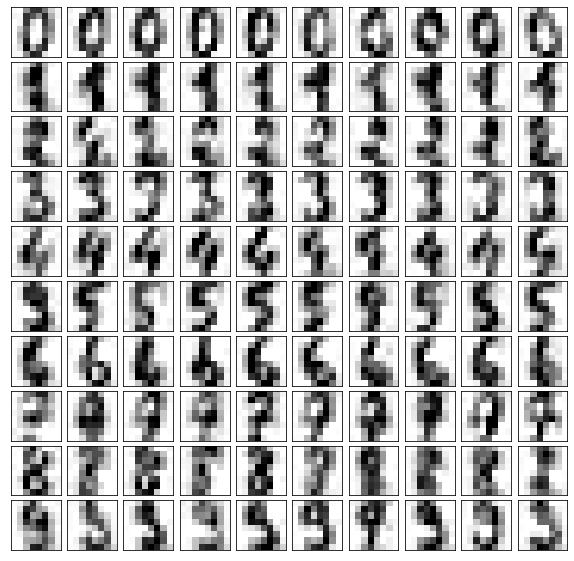

In [121]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

对比两个图像，后面图像平滑了很多。